<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 14
### Applied Machine Learning


__1. [20 pts] Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped.__

`import cv2
IMGSIZE = (128, 128)
X_tr, y_tr, X_ts, y_ts = [], [], [], []
for label in _labels:
     path = _path + '/seg_train/seg_train/' + label
     for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
     X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
     y_tr += [CNAMES.index(label)]`
 
 __Display a few images. How many image channels are there?__

In [1]:
import tensorflow as tf
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

IMGSIZE = (128, 128)
_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
_path = 'intel-image-classification'

X_train, y_train = [], []
for label in _labels:
    path = _path + '/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_train += [cv2.resize(cv2.imread(os.path.join(path, f)), IMGSIZE)]
        y_train += [_labels.index(label)]

X_test, y_test = [], []
for label in _labels:
    path = _path + '/seg_test/seg_test/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_test += [cv2.resize(cv2.imread(os.path.join(path, f)), IMGSIZE)]
        y_test += [_labels.index(label)]

Text(0.5, 1.0, 'Train Distribution')

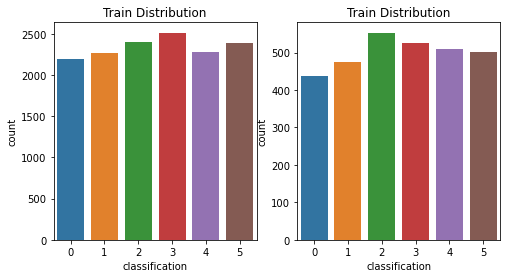

In [2]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121)
sns.countplot(y_train, ax=ax)
ax.set_xlabel('classification')
ax.set_title('Train Distribution')

ax1 = fig.add_subplot(122)
sns.countplot(y_test, ax=ax1)
ax1.set_xlabel('classification')
ax1.set_title('Train Distribution')

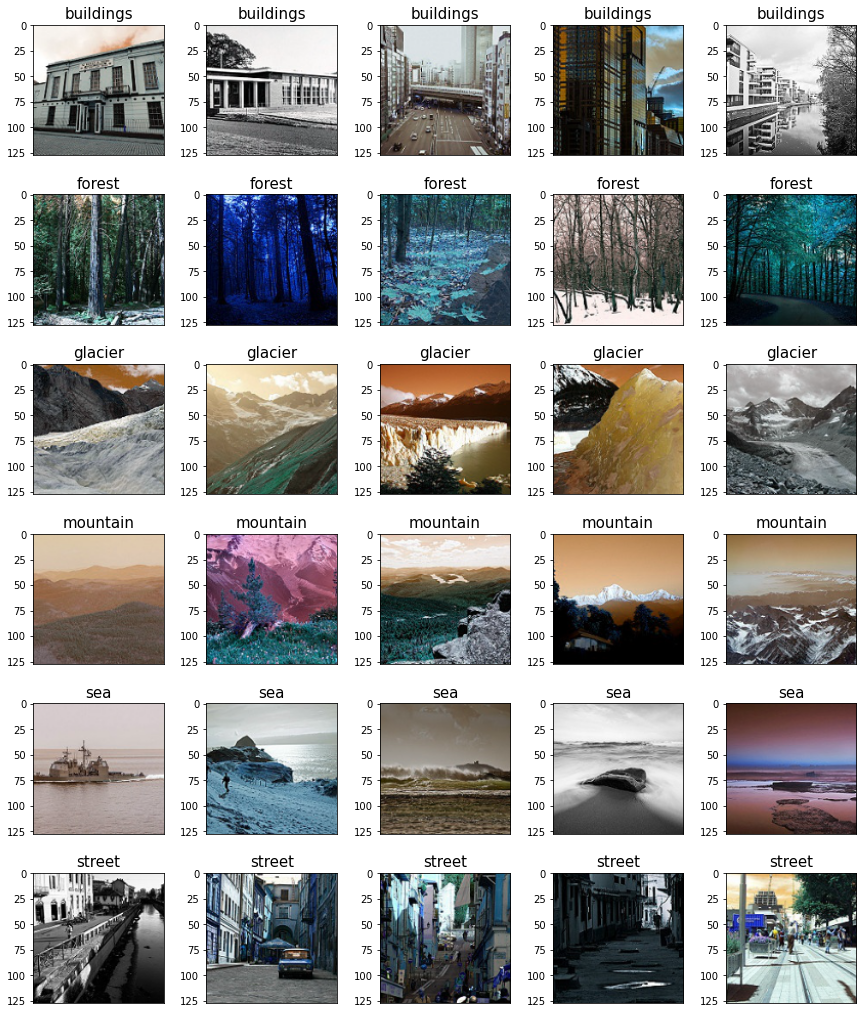

In [3]:
y_tr = np.array(y_train)
fig = plt.figure(figsize=(15, 18))
j = 1
for i, label in enumerate(_labels):
    class_rand = np.random.choice(np.where(y_tr == i)[0], 5)
    for index in class_rand:
        ax = fig.add_subplot(6, 5, j)
        ax.margins(y=0.2)
        j += 1
        ax.set_xticks([]); ax.set_xticks([])
        ax.imshow(X_train[index])
        ax.set_title('{}'.format(label), size=15)
fig.subplots_adjust(hspace=0.3)
plt.show()

In [4]:
print('# Channels =', X_train[0].shape[-1])

# Channels = 3


__2. [20 pts] Convert the imageset to numpy array, such as the array size is `(14034, 128, 128, 3)`. Scale the imageset to [0-1].__

In [5]:
X_train = np.array(X_train, dtype=np.float32)
X_train = X_train/255.0
y_train = np.array(y_train)

X_test = np.array(X_test, dtype=np.float32)
X_test = X_test/255.0
y_test = np.array(y_test)

__3. [40 pts] Create a convolutional neural network to train and report its performance on the testing portion of the dataset. 95% reclassification and 75% testing accuracy should be easily achievable without any hyperparameter tuning. (Hint: My model, which is similar to the model in module notebook, took around 10 minutes to train 10 epochs.)__

I also need to decrease the number of epochs, filters numbers and units because it runs for a long time.

In [6]:
from tensorflow.keras import layers
tf.keras.backend.clear_session()

singe_input_shape = X_train[0].shape

nn = tf.keras.Sequential([
    layers.Conv2D(filters=4, kernel_size=(5,5), data_format='channels_last',
                  input_shape=singe_input_shape, name='conv1', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_1'),
    layers.Conv2D(filters=8, kernel_size=(5,5),
                  name='conv2', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    layers.Flatten(),
    layers.Dense(units=64, name='fc_1', activation='relu'),
    layers.Dense(units=6, name='fc_2', activation='softmax')
])

nn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 124, 124, 4)       304       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 62, 62, 4)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 58, 58, 8)         808       
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 29, 29, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6728)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 64)                430656    
_________________________________________________________________
fc_2 (Dense)                 (None, 6)                 3

In [7]:
nn.save_weights('nn_images_1.h5')

In [8]:
## fit
NUM_EPOCHS = 8

history = nn.fit(X_train, y_train,
                 shuffle=True, 
                 epochs=NUM_EPOCHS,
                 verbose=1)

Train on 14034 samples
Epoch 1/8
14034/14034 [==============================] - 117s 8ms/sample - loss: 0.9780 - accuracy: 0.6207
Epoch 2/8
14034/14034 [==============================] - 113s 8ms/sample - loss: 0.7201 - accuracy: 0.7364
Epoch 3/8
14034/14034 [==============================] - 114s 8ms/sample - loss: 0.5941 - accuracy: 0.7820
Epoch 4/8
14034/14034 [==============================] - 115s 8ms/sample - loss: 0.4938 - accuracy: 0.8236
Epoch 5/8
14034/14034 [==============================] - 115s 8ms/sample - loss: 0.4006 - accuracy: 0.8571
Epoch 6/8
14034/14034 [==============================] - 113s 8ms/sample - loss: 0.3194 - accuracy: 0.8856
Epoch 7/8
14034/14034 [==============================] - 116s 8ms/sample - loss: 0.2475 - accuracy: 0.9166
Epoch 8/8
14034/14034 [==============================] - 111s 8ms/sample - loss: 0.1948 - accuracy: 0.9334


Keras predict_classes function will be deprecated next year:
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict_classes

In [9]:
y_pred = np.argmax(nn.predict(X_test), axis=-1)
print(f'Accuracy= {sum(np.equal(y_test, y_pred))/3000:.3f}')

Accuracy= 0.740


In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd

## ALWAYS add y_true first for confuscion matrices because they make the truth the y-axis i.e. the rows
## see https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=_labels, columns=_labels)
cm_df_perc = round(cm_df.div(cm_df.sum(axis=1), axis=0), 3)
cm_df_perc

,buildings,forest,glacier,mountain,sea,street
buildings,0.549,0.064,0.025,0.043,0.048,0.270
forest,0.017,0.932,0.011,0.004,0.004,0.032
glacier,0.020,0.009,0.769,0.150,0.042,0.011
mountain,0.027,0.008,0.135,0.762,0.055,0.013
sea,0.045,0.006,0.169,0.145,0.608,0.027
street,0.082,0.058,0.030,0.020,0.008,0.802


In [11]:
class_accs = dict()
for i in range(6):
    class_accs[cm_df_perc.index[i]] = cm_df_perc.iloc[i, i]
sorted_accuracies = sorted(class_accs.items(), key=lambda x: x[1], reverse=True)

print("Sorted class accuracies:\n", sorted_accuracies)
print()
print("Total test accuracy =", f'{sum(np.equal(y_test, y_pred))/3000:.3f}')

Sorted class accuracies:
 [('forest', 0.932), ('street', 0.802), ('glacier', 0.769), ('mountain', 0.762), ('sea', 0.608), ('buildings', 0.549)]

Total test accuracy = 0.740


Looks like `forests` images have the highest accuracy and `buildings` have the worst.

In [12]:
## Reclassification
X_reclass = np.concatenate((X_train, X_test), axis=0)
y_reclass = np.concatenate((y_train, y_test), axis=0)

print(len(X_reclass))
print(len(y_reclass))

17034
17034


In [13]:
y_pred_reclass = np.argmax(nn.predict(X_reclass), axis=-1)
print(f'Reclassification Accuracy = {sum(np.equal(y_reclass, y_pred_reclass))/len(X_reclass):.3f}')

Reclassification Accuracy = 0.925


Not bad.  Just over 90% accuracy.

__4. [20 pts] Add regularization and/or drop-out features to your CNN. Report your model's best performance.__

I wasn't sure whether to use `Dropout` before in between Conv2D and MaxPooling2D (after Conv2D) or after MaxPooling2D but I looked up it should not make much of a difference where.

https://www.quora.com/Is-it-advisable-to-place-a-dropout-layer-before-the-max-pooling-layer-in-CNN

I also need to decrease the filters and units because it runs for a long time.

In [14]:
from tensorflow.keras import regularizers

nn2 = tf.keras.Sequential([
    layers.Conv2D(filters=4, kernel_size=(5,5), data_format='channels_last',
                  input_shape=singe_input_shape, name='conv1', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_1'),
    layers.Dropout(rate=0.3),
    layers.Conv2D(filters=8, kernel_size=(5,5),
                  name='conv2', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    layers.Dropout(rate=0.3),
    layers.Flatten(),
    layers.Dense(units=64, name='fc_1', activation='relu', activity_regularizer=regularizers.l2(1e-5)),
    layers.Dense(units=6, name='fc_2', activation='softmax', activity_regularizer=regularizers.l2(1e-5))
])

nn2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 124, 124, 4)       304       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 62, 62, 4)         0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 4)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 58, 58, 8)         808       
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 29, 29, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6728)             

In [15]:
## fit2
NUM_EPOCHS = 8

history2 = nn2.fit(X_train, y_train,
                   shuffle=True, 
                   epochs=NUM_EPOCHS,
                   verbose=1)

Train on 14034 samples
Epoch 1/8
14034/14034 [==============================] - 128s 9ms/sample - loss: 1.0849 - accuracy: 0.5674
Epoch 2/8
14034/14034 [==============================] - 125s 9ms/sample - loss: 0.7966 - accuracy: 0.6986
Epoch 3/8
14034/14034 [==============================] - 118s 8ms/sample - loss: 0.7030 - accuracy: 0.7401
Epoch 4/8
14034/14034 [==============================] - 115s 8ms/sample - loss: 0.6326 - accuracy: 0.7654
Epoch 5/8
14034/14034 [==============================] - 116s 8ms/sample - loss: 0.5793 - accuracy: 0.7840
Epoch 6/8
14034/14034 [==============================] - 117s 8ms/sample - loss: 0.5230 - accuracy: 0.8035
Epoch 7/8
14034/14034 [==============================] - 116s 8ms/sample - loss: 0.4843 - accuracy: 0.8177
Epoch 8/8
14034/14034 [==============================] - 115s 8ms/sample - loss: 0.4496 - accuracy: 0.8317


In [16]:
y_pred2 = np.argmax(nn2.predict(X_test), axis=-1)
print(f'Accuracy= {sum(np.equal(y_test, y_pred2))/3000:.3f}')

Accuracy= 0.722


In [17]:
## ALWAYS add y_true first for confuscion matrices because they make the truth the y-axis i.e. the rows
## see https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
cm2 = confusion_matrix(y_test, y_pred2)
cm_df2 = pd.DataFrame(cm2, index=_labels, columns=_labels)
cm_df_perc2 = round(cm_df2.div(cm_df2.sum(axis=1), axis=0), 3)
cm_df_perc2

,buildings,forest,glacier,mountain,sea,street
buildings,0.584,0.034,0.016,0.087,0.110,0.169
forest,0.011,0.945,0.000,0.011,0.008,0.025
glacier,0.011,0.011,0.465,0.199,0.293,0.022
mountain,0.011,0.006,0.061,0.737,0.177,0.008
sea,0.025,0.008,0.025,0.096,0.827,0.018
street,0.090,0.058,0.010,0.016,0.032,0.794


In [18]:
class_accs2 = dict()
for i in range(6):
    class_accs2[cm_df_perc2.index[i]] = cm_df_perc2.iloc[i, i]
sorted_accuracies2 = sorted(class_accs2.items(), key=lambda x: x[1], reverse=True)

print("Sorted class accuracies with dropout:\n", sorted_accuracies2)
print()
print("Total test accuracy with dropout =", f'{sum(np.equal(y_test, y_pred2))/3000:.3f}')

Sorted class accuracies with dropout:
 [('forest', 0.945), ('sea', 0.827), ('street', 0.794), ('mountain', 0.737), ('buildings', 0.584), ('glacier', 0.465)]

Total test accuracy with dropout = 0.722


So the results with regularization and knockout were slightly worse, 72.2%, versus 74.0% without it.  That is probably because we did not train initially with enough epoch to cause overfitting.  This would take too long on a regular computer.  Please see my other notebook that utilizes batches instead of storing entire arrays in memory.